Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [205]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [206]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

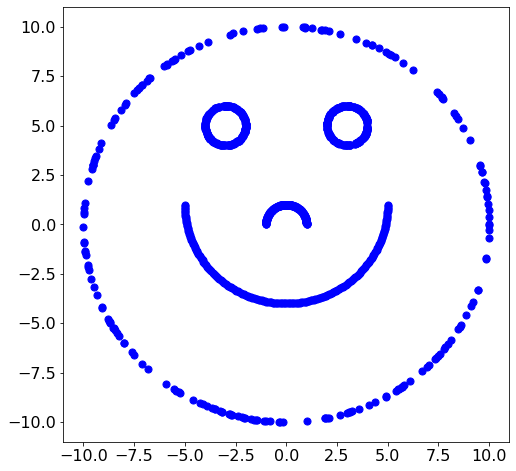

In [207]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


## a)

In [208]:
import random as random
def Randommeans(data,k): #function for random initialization of means
    D = data.shape[1]
    means = np.zeros((k,D)) #initlize with 0
    min = np.min(data) 
    max = np.max(data)
    for i in range(k):
        for f in range(D):
            means[i][f] = random.uniform(min, max) #getting random value between maximum and minimum
    return means #return randomly initialize means

def kmeans(data, k,inittype):
    N = data.shape[0] #no. of points
    D = data.shape[1] #no. of dimensions
    labels = -1*np.zeros(N)
    itr = 0
    means =inittype(data,k) #getting initialize means
    while(True): 
        for i in range(N): 
            distmin = (np.linalg.norm(data[i] - means[0]))**2 #for minimum distance
            minindex = 0 #index for minimum distance mean
            for j in range(k):# iterating over all means
                dcurrent = (np.linalg.norm(data[i] - means[j]))**2 #finding between distance of data point and current mean
                if(dcurrent < distmin): #checking current distance is less than minimum distance
                    distmin = dcurrent #updating min. distance 
                    minindex = j #update index to closest mean
            labels[i] = minindex #closest mean point for current point
        FLAG = True 
        # for convergence condition
        for i in range(k):
            dli = data[np.where(labels == i)] # finding data point with having same cluster mean
            ndli = np.mean(dli,0) #taking mean for that selected points
            for f in range(D):
                FLAG = FLAG and (means[i][f] == ndli[f]) # set FLAG true when current mean is equal to previous, otherwise false -- check for each cluster means and corresponding data points
        if(FLAG == True):# return cluster means and labels for data points if Flag is true
            return labels, means
        else: # if FLAG is false then update means
            for i in range(k):
                dli = data[np.where(labels == i)]
                ndli = np.mean(dli,0)
                means[i] = ndli #update mean
        itr+=1

<function matplotlib.pyplot.show(close=None, block=None)>

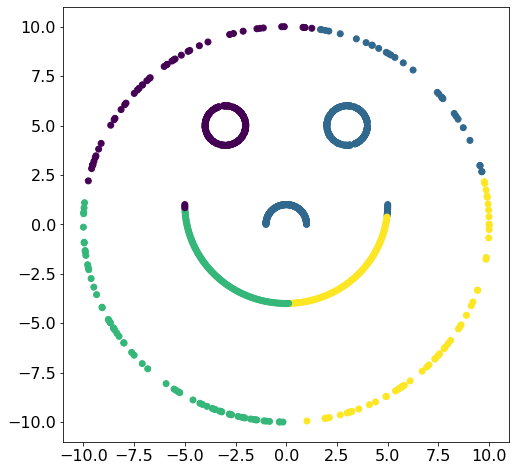

In [209]:
result=kmeans(X, 4, Randommeans)
labels = result[0] #labels for each data points
fig = getFigure( 8, 8 )
plt.scatter(X[:,0], X[:,1], c = labels)
plt.show
# as in below figure point with same cluster mean have  same color

When we take the number of clusters as 4, the clustering is as shown above.

## b)

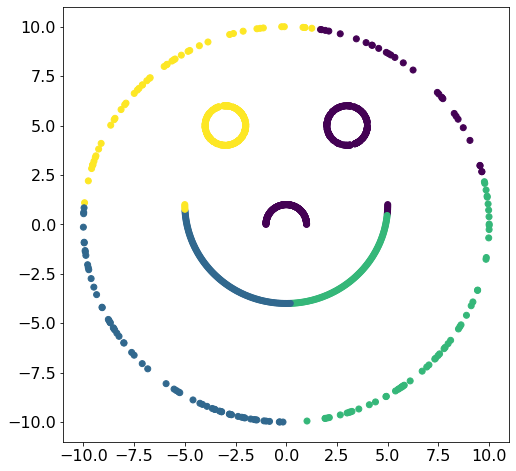

In [210]:
def distance(p1, p2): 
    return np.sum((p1 - p2)**2)
def initialize(data,k):
    #method is used to initialize the means 
    means = []
    N = data.shape[0]
    D = data.shape[1]
    means.append(data[np.random.randint(data.shape[0]), :])# first mean choosen randomly
    for c_id in range(k - 1): #remaing k-1 means
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = float('inf')
            for j in range(len(means)):#finding distace between means and given data point
                temp_dist = distance(point, means[j])
                d = min(d, temp_dist)
            dist.append(d)
        dist = np.array(dist) 
        nmean = data[np.argmax(dist), :]#finding farthest point
        means.append(nmean) #append that mean
        dist = []
    return means
#kmeans++ :- initializing means using initialize function
result=kmeans(X, 4,initialize)# 4= no. of clusters
labels = result[0]
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c = labels)
plt.show()
#The clusters are formed as below when we use k-means++ to initialize the cluster means carefully.

## c)

Text(0, 0.5, 'k-mean objective')

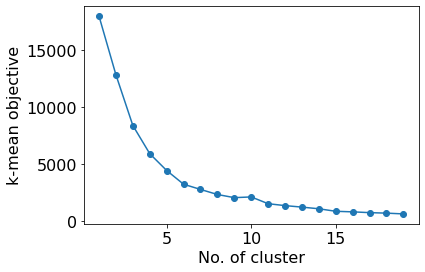

In [214]:
distortions = [] #storing Within-Cluster Sum of Square(WCSS)
K = range(1,20) # generating 20 different values of k
for k in K:
    result = kmeans(X, k,initialize) #running k-means++ algo. for given no. of clusters(i.e k)
    label=result[0] #cluster id for each  data points
    m=result[1] #cluster means/centroid
    error = 0
    for i in range(len(X)):# calculating WCSS
        curr_center = m[int(label[i])]# selecting cluster mean to which given point belongs
        error += ((X[i, 0] - curr_center[0])**2 + (X[i, 1] - curr_center[1])**2)/len(curr_center) # finding distance between mean and data point
    distortions.append(error)
plt.plot(K,distortions,marker="o")
plt.xlabel("No. of cluster") #no. of clusters k=1,2,....20
plt.ylabel("k-mean objective")# within cluster sum of squares

The best value of k is the value of k at the "Elbow point" in the above plot, i.e. when k is around 5.Any value of k still does not cluster this dataset propely since the decision boundary learnt by the standard k-means or k-means++ algorithm is linear and the above dataset contains non-linear plotting of data points. Hence we need to learn a non-linear decision boundary in order to cluster this dataset properly.

(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

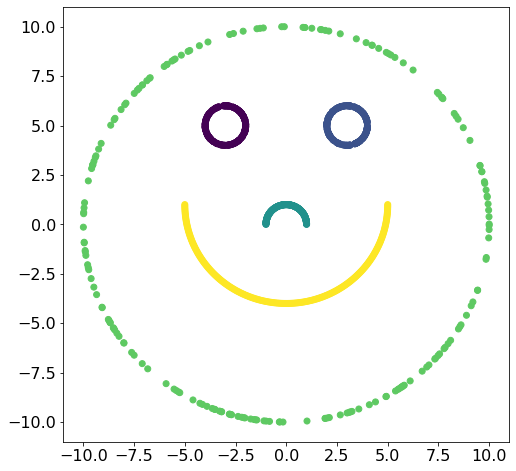

In [216]:
def Distance(data1, data2): #finding distance between two data points
    sum = 0 
    dim = len(data1) 
    for i in range(dim):
        sum += (data1[i] - data2[i]) * (data1[i] - data2[i]) 
    return sum
#kernel method help to convert data X into new feature space using RBF/gaussian kernel 
def kernel(data, sigma):
    N = len(data) #no. of data points
    M = [[0] * N for i in range(N)] #initlize new feature space with zero
    for i in range(N):
        for j in range(i,N):
            if i != j: 
                square_dist = Distance(data[i],data[j]) #finding distance between two points
                base = 2*sigma**2
                M[i][j] = np.exp(-square_dist/base) 
                M[j][i] = M[i][j]
    return M # this matrix M is symmetrical matrix
X2=kernel(X,3) #X2 is new feature space generated from X and sigma is free parameter used in RBF kerel sigma=3 gives good clustering results 
X2=np.array(X2) 
result=kmeans(X2,5,initialize)# running k means on new feature space
labels = result[0] 
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c = labels)
means=np.array(result[1])
plt.show()
# as in below figure point with same cluster mean have  same color
# by using kernel we can see data are well clusted

From the above plotting, we can clearly see that kernelizing the k-means algorithm clusters this dataset accurately.

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

### (a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]


Let $k$ Spherical gaussians
$$
\Theta=\left\{\mu_{1}, \mu_{2}, \ldots \mu_{k}, \sigma_{1}^{2}, \sigma_{2}^{2}, \ldots \sigma_{k}^{2}\right\}
$$
density of spherical gaussian be $N\left(u, \sigma^2{I_{D}}\right), x \in R^{d}$
$$
P(x)=\frac{1}{(2 \pi)^{d / 2} \sigma^{d}} \operatorname{exp}\left(\frac{-\|x-\mu\|^{2}}{2 \sigma^{2}}\right)
$$

1) conditional probability

$$p(\textit{z}_n = k|\textit{x}_n, \hat{\Theta})\;\;\alpha\;\;p(\textit{z}_n = k|\hat{\Theta}) * p(\textit{x}_n|\textit{z}_n = k, \hat{\Theta})$$

$$p(\textit{z}_n = k|\textit{x}_n, \hat{\Theta})= \pi_k * N(\textit{x}_n|{\mu_k}, {\sigma_k^2}I_D)$$


Also,

2) $ \Theta $ for expected complete log likelihood

$$\hat{\Theta} = argmax_{\Theta} E_{p(Z|X, \hat{\Theta})} [log(p(X,Z|\Theta))]$$

$$= argmax_{\Theta} E_{p(Z|X, \hat{\Theta})} \Bigg[\sum_{n=1}^N log(p(\textit{x}_n,\textit{z}_n|\Theta))\Bigg]$$

Now probabitity of observing  the data points
$p(\textit{x}_n,\textit{z}_n|\Theta) = \sum_{k=1}^K (p(\textit{z}_n = k|\hat{\Theta}) * p(\textit{x}_n|\textit{z}_n = k, \hat{\Theta}))^{\textit{z}_{nk}}$


We have mixture weights as
$\left\{\pi_{1}, \pi_{2}, \ldots \pi_{k}\right\} \rightarrow$ given these are fixed

where $\textit{z}_{nk} = 1$ when $\textit{x}_n$ belongs to $k^{th}$ cluster, else $\textit{z}_{nk} = 0$
$$
z_{n 1}+z_{n 2}+\cdots+z_{n k}=1 \quad \forall n \in N
$$
So,

$$\hat{\Theta} = argmax_{\Theta} E\Bigg[\sum_{n=1}^N  \sum_{k=1}^K  \textit{z}_{nk} [log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]\Bigg]$$

using the expectation of $\textit{z}_{nk}$

$$\hat{\Theta}=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K E_{p(\textit{z}n|\textit{x}_n, \hat{\Theta})}\;[\textit{z}_{nk}]\;[log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]$$


Expectation Step

$$E[\textit{z}_{nk}] = \gamma_{nk}$$

$$\gamma_{nk}= 0 * p(\textit{z}{nk} = 0 | \textit{x}_n, \hat{\Theta}) + 1 * p(\textit{z}{nk} = 1 | \textit{x}_n, \hat{\Theta})$$

$$\gamma_{nk}= \frac{\pi_k * N(\textit{x}n|\hat{\mu}_k, \hat{\sigma}_k^2 I_D)}{\sum_{i=1}^K \pi_i * N(\textit{x}_n|\hat{\mu}_i, \hat{\sigma}_i^2 I_D)}$$

$$N_k = \sum_{n=1}^N \gamma_{nk}$$

Maximization Step

$$\hat{\Theta} = argmax_{\Theta} \sum_{n=1}^N  \sum_{k=1}^K E_{p(\textit{z}n|\textit{x}_n, \hat{\Theta})}\;[\textit{z}{nk}]\;[log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]$$

$$\hat{\Theta}= argmax_{\Theta} \sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;[log\,\pi_k + log\,N(\textit{x}_n|\mu_k, \sigma_k^2 I_D)]$$

$$\hat{\Theta}=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;[log\,\pi_k + log\frac{1}{\sqrt{(2\pi)^D|\sigma_k^2I_D|}}exp\Bigg(-\frac{1}{2}(\textit{x}_n - \mu_k)^T\frac{I_D}{\sigma_k^2}(\textit{x}_n - \mu_k)\Bigg)$$

$$\hat{\Theta}=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;[log\,\pi_k + log\frac{1}{(2\pi)^{\frac{D}{2}}(\sigma_k^2)^\frac{D}{2}}exp\Bigg(-\frac{1}{2}(\textit{x}_n - \mu_k)^T\frac{I_D}{\sigma_k^2}(\textit{x}_n - \mu_k)\Bigg)$$

$$\hat{\Theta}=argmax_{\Theta}\sum_{n=1}^N  \sum_{k=1}^K \gamma_{nk}\;\Bigg[log\,\pi_k + -\frac{D}{2}log(2\pi) - \frac{D}{2}log(\sigma_k^2) - \Big(\frac{1}{2\sigma_k^2}(\textit{x}_n - \mu_k)^TI_D(\textit{x}_n - \mu_k)\Big)\Bigg]$$



$\\$To find the MLE estimates of $\mu_k$ and $\sigma_k^2$ we will take the partial derivative of the above expression with respect to $\mu_k$ and $\sigma_k^2$.

Finding $\mu_{k}$<br>
$$
\frac{\partial \hat{\Theta}}{\partial \mu_{k}}=0
$$

$$
\begin{align*}
&\text{}\\
&\sum_{n=1}^{N} \gamma_{n k}\left[-\frac{\partial}{\partial \mu_{k}}\left(\frac{1}{2\sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
&\sum_{n=1}^{N} \gamma_{n k}\left[-\left(\frac{\left(x_{n}-\mu_{k}\right)}{\sigma_{k}^{2}}\right)\right]=0 \\
& \sum_{n=1}^{N}-\gamma_{n k}\left(x_{n}-\mu_{k}\right)=0 \\
& \sum_{n=1}^{N}-\gamma_{n k} x_{n}+\sum_{n=1}^{N} \gamma_{n k} \mu_{k}=0 \\
& \mu_{k} \sum_{n=1}^{N} \gamma_{n k}=\sum_{n=1}^{N} \gamma_{n k} x_{n} \\
& \mu_{k}=\frac{\sum_{n=1}^{N} \gamma_{n k} x_{n}}{\sum_{n=1}^{N} \gamma_{n k}} \\
& \mu_{k}=\frac{\sum_{n=1}^{N} \gamma_{n k} x_{n}}{N_{k}}
\end{align*}
$$

Finding $\sigma_{k}^{2}$<br>
$$
\frac{\partial \hat{\Theta}}{\partial \sigma_{k}^{2}}=0
$$

$$
\begin{align*}
\\
& \sum_{n=1}^{N} \gamma_{n k} \frac{\partial}{\partial \sigma_{k}^{2}}\left[-\frac{D}{2} \log\left(\sigma_{k}^{2}\right)-\left(\frac{1}{2 \sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
&\sum_{n=1}^{N} \gamma_{n k}\left[-\frac{D}{2 \sigma_{k}^{2}}-\left(-\frac{1}{2\left(\sigma_{k}^{2}\right)^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
& \sum_{n=1}^{N} \gamma_{n k}\left[D \sigma_{k}^{2}-\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right]=0 \\
&\sum_{n=1}^{N} \gamma_{n k} D \sigma_{k}^{2}=\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right) \\
& D \sigma_{k}^{2} \sum_{n=1}^{N} \gamma_{n k}=\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right) \\
& \sigma_{k}^{2}=\frac{\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right)}{N_{k} D}
\end{align*}
$$

We dont need to update  $\pi_{k}$ since it is given as fixed.


The EM Algorithm will be :<br>
1. Initialization
$$
\text{Set $\Theta$ =$\left\{\mu_{k}, \sigma_{k}^{2}\right\}_{k=1}^{K}$ as $\Theta^{0}$ and $t=0$}
$$<br><br>

2. E-Step
$$
\begin{align*}
E\left[z_{n k}\right]=\gamma_{n k} &= \frac{\pi_{k} * N\left(x_{n} \mid \mu_{k}^{t-1},\left(\sigma_{k}^{2}\right)^{t-1} I_{D}\right)}{\sum_{i=1}^{K} \pi_{i} * N\left(x_{n} \mid \mu_{k}^{t-1},\left(\sigma_{k}^{2}\right)^{t-1} I_{D}\right)} \\
N_{k} &= \sum_{n=1}^{N} \gamma_{n k}
\end{align*}
$$<br><br>

3. M-Step
$$
\begin{align*}
\mu_{k}^{t} &= \frac{\sum_{n=1}^{N} \gamma_{n k}^{t} x_{n}}{N_{k}^{t}} \\
\left(\sigma_{k}^{2}\right)^{t} &= \frac{\sum_{n=1}^{N} \gamma_{n k}^{t}\left(x_{n}-\mu_{k}^{t}\right)^{T}\left(x_{n}-\mu_{k}^{t}\right)}{N_{k}^{t} D}
\end{align*}
$$

### (b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

In [225]:
# generating sythetic data
np.random.seed(500)
X = np.random.multivariate_normal([5, 0], [[1, 0], [0, 1]], 50)#cluster 1
X = np.vstack((X, np.random.multivariate_normal([0,0], np.identity(2), 50)))#cluster 2
X = np.vstack((X, np.random.multivariate_normal([0,6], np.identity(2), 50)))#cluster 3
data=X
# Model parameters
init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 5]  # mean of cluster 3
]
init_covariances = [
    [[1, 0.], [0, 1]], # covariance of cluster 1
    [[1, 0], [0,1]], # covariance of cluster 2
    [[1, 0], [0, 1]]  # covariance of cluster 3
]

Text(0.5, 1.0, 'sythetic data with 3 different cluster')

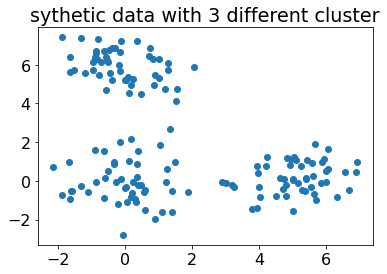

In [226]:
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.title("sythetic data with 3 different cluster")

In [227]:
def loglikelihood(data, weights, means, covs):
    #computing loglikelihood for given GMM for given parameters
    num_clusters = len(means)
    num_dim = len(data[0])
    ll = 0
    for d in data:
        Z = np.zeros(num_clusters)
        for k in range(num_clusters):
            # Compute (x-mu)^T * Sigma^{-1} * (x-mu)
            delta = np.array(d) - means[k]
            exponent_term = np.dot(delta.T, np.dot(np.linalg.inv(covs[k]), delta))
            # Compute loglikelihood contribution for this data point and this cluster
            Z[k] += np.log(weights[k])
            Z[k] -= 1/2. * (num_dim * np.log(2*np.pi) + np.log(np.linalg.det(covs[k])) + exponent_term)
        # Increment loglikelihood contribution of this data point across all clusters
        log_sum= np.max(Z) + np.log(np.sum(np.exp(Z - np.max(Z))))
        ll += log_sum
    return ll
#E-step
def e_step(data,means,weights,covariances,prob):
    num_data=len(data) #no. of data points
    num_clusters=len(means) #no. of clusters
    for j in range(num_data):
        for k in range(num_clusters):#calculating posterior prob.
            prob[j, k] = weights[k]*multivariate_normal.pdf(data[j],means[k],covariances[k])
    row_sums = prob.sum(axis=1)[:, np.newaxis]
    prob = prob / row_sums # normalize over all possible cluster assignments
    return prob
#M-step
def m_step(data,means,covariances,resp,weights):
    counts = np.sum(resp, axis=0)
    num_data=len(data) #no. of data points
    num_clusters=len(means) #no. of clusters
    num_dim = len(data[0]) # no. of data points
    for k in range(num_clusters):
        #updating weights for each cluster
        weights[k] = counts[k]/num_data
        # Update means for cluster k 
        weighted_sum = 0
        for j in range(num_data):
            weighted_sum += (resp[j,k]*data[j])
        means[k] = weighted_sum/counts[k]
        # Update covariances for cluster k 
        weighted_sum = np.zeros((num_dim, num_dim))
        for j in range(num_data):
            weighted_sum += (resp[j,k]*np.outer(data[j]-means[k],data[j]-means[k]))
        covariances[k] = weighted_sum/counts[k]
    return weights,means,covariances  #returning upadated parameters values

In [228]:
from scipy.stats import multivariate_normal
def EM(data, init_means, init_covariances, init_weights, maxiter=1000, thresh=1e-5):
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]
    num_data = len(data)#no. of datapoints
    num_dim = len(data[0])#no. of dimenations
    num_clusters = len(means)#no of clusters
    # Initializing the variables
    prob = np.zeros((num_data, num_clusters))
    ll = loglikelihood(data, weights, means, covariances)
    ll_trace = [ll]
    for i in range(maxiter):
        # E-step: compute responsibilities
        prob=e_step(data,means,weights,covariances,prob)
        # M-step 
        result=m_step(data,means,covariances,prob,weights)
        weights=result[0]
        means=result[1]
        covariances=result[2]
        # Compute the loglikelihood at this iteration
        ll_latest = loglikelihood(data, weights, means, covariances)
        ll_trace.append(ll_latest)
        # Check for convergence in log-likelihood and store
        if (ll_latest - ll) < thresh and ll_latest > -np.inf:
            break
        ll = ll_latest
    return weights,means,covariances,prob

In [229]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
#     Bivariate Gaussian distribution for equal shape *X*, *Y*.
    Xmu = X-mux
    Ymu = Y-muy
    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

def plot_contours(data, means, covs, title):
    plt.figure(figsize=(6,4))
    plt.scatter(data[:,0],data[:,1],c='k') # data
    delta = 0.025
    k = len(means)
    x = np.arange(-2.0, 7.0, delta)
    y = np.arange(-2.0, 7.0, delta)
    X, Y = np.meshgrid(x, y)
    col = ['green', 'red', 'blue']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        sigmax = np.sqrt(cov[0][0])
        sigmay = np.sqrt(cov[1][1])
        sigmaxy = cov[0][1]/(sigmax*sigmay)
        Z = bivariate_normal(X, Y, sigmax, sigmay, mean[0], mean[1], sigmaxy)
        plt.contour(X, Y, Z, colors = col[i])
        plt.title(title)
    plt.rcParams.update({'font.size':16})
    plt.tight_layout()

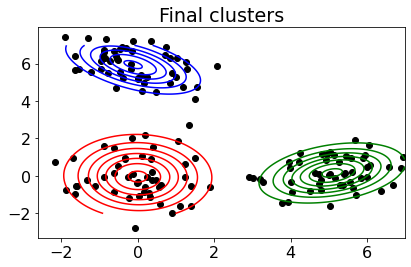

In [231]:
# Parameters after running EM to convergence
np.random.seed(500)
chosen = np.random.choice(len(data), 3, replace=False)
initial_means = [data[x] for x in chosen]# initializing cluster means
initial_covs = [np.cov(data, rowvar=0)] * 3 # initializing covariances
initial_weights = [1/3.] * 3 # initializing cluster weigths
results = EM(data, initial_means, initial_covs, initial_weights) #running EM algo. of current data
res_mean=results[1] #updates means
res_cov=results[2] #updates covariances
res_prob=results[3]#updates probabilities
plot_contours(data, res_mean, res_cov, 'Final clusters')
# below graph shows that the EM algorithm for GMM works well.

The above contour plot shows the result of clustering when we have used the above EM algorithm on synthetic data with 3 clusters. 

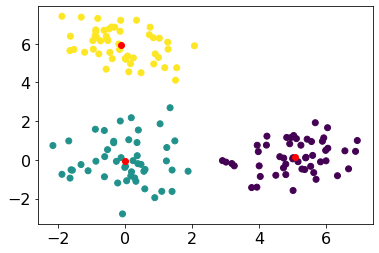

In [232]:
#plotting data 
li=[]
for i in res_prob:
    ind=np.where(i == i.max())
    li.append(int(ind[0]))
plt.scatter(X[:,0],X[:,1],c=li)
li1=[]
for i in range(0,3):
        li1.append(list(res_mean[i]))
li1=np.array(li1)
li1
mean=res_mean
plt.scatter(li1[:,0],li1[:,1],c='r')
#each red point refers means 